# Monte Carlo for maths and quantitative finance   

## The recipe

1. Simulate the underlying asset under the risk-neutral random walk.<br>
2. Calculate the option payoff for the choice of derivative security. Repeat for several price paths.<br>
3. Average the discounted payoff.

### Generate Price Paths
Simulating price paths plays an important role in the valuation of derivatives and it is always prudent to create a separate path function.

<h5>Numpy Vectorization</h5>
One of the two major benefits of using Numpy is<br>

a) **Syntax**: compact, vectorized syntax allowing for even 100,000 calculations within a single line of code.<br>
b) **Speed**: faster as majority of the code is implemented in C.

Assume, we have a vector with the first 100 natural numbers 1,2, 3,...100

$$
\vec v = \begin{pmatrix} 1 \\ 2 \\ . \\ . \\ . \\ 100 \end{pmatrix}
$$

then, the scalar multiplication of this vector is written compactly as:

$$
\vec u = 2 \cdot \vec v = \begin{pmatrix} 2 \\ 4 \\ . \\ . \\ . \\ 200 \end{pmatrix}
$$

Let's see this with an example

In [71]:
# define a array
v = arange(1,101)
v

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [74]:
# scalar multiplication
u=2*v
type(u)

numpy.ndarray

### Simulating Equity Prices

Simulate the asset price. We can do each complete price path over the time horizon to expiry $T$. If the option is path independent we can obtain an explicit solution for a GBM under the risk neutral measure $\mathbb {Q}$. More on this in your later courses. 


\begin{equation*}
   dS_{t} = rS_{t}dt + σS_{t}dW_{t} 
\end{equation*}

where $S_{t}$ is the price of the underlying at time $t$, σ is constant volatility, $r$ is the constant risk-free interest rate and $W_{t}$ is a Brownian motion under $\mathbb {Q}$.<br>

Applying Euler-Maruyama to write the above in discrete form where $\phi \sim N(0,1)$
\begin{equation*}
   S_{i+1} = S_{i} (1+r{\delta}t+{\sigma}{\sqrt{\delta}t}{\phi})
\end{equation*}
Once the simulations are done, a large number of path dependent options can be priced.
Use the expected value of the discounted payoff under the risk-neutral density $\mathbb{Q}$
$$
V(S,t) =\mathbb{E^{\mathbb{Q}}}[e^{-\int\nolimits_{t}^{T}r_{\tau }d\tau} {\mathrm {Payoff}(S)}]$$


### Closed form solution
If we now consider $S$ which follows a lognormal random walk, i.e. $V=\log
(S)$ then
\begin{equation}
d(\log(S))=\left( \mu -\frac{1}{2}\sigma ^{2}\right) dt+\sigma
dW_{t}
\end{equation}
Integrating both sides over a given time horizon ( between $t_{0}$ and $T$ )
\begin{equation}
\int_{t_{0}}^{T}d(\log(S))=\int_{t_{0}}^{T}\left( \mu -\frac{1%
}{2}\sigma ^{2}\right) dt+\int_{t_{0}}^{T}\sigma dW\text{ }\left(
T>t_{0}\right)
\end{equation}
we obtain

\begin{equation}
\log \frac{S\left( T\right) }{S\left( t_{0}\right) }=\left( \mu -\frac{1}{2}%
\sigma ^{2}\right) \left( T-t_{0}\right) +\sigma \left( W\left( T\right)
-W\left( t_{0}\right) \right)
\end{equation}
Assuming at $t_{0}=0$, $W(0) =0$ and $S(0) =S_{0}$ the exact solution becomes

\begin{equation}
S_{T}=S_{0}\exp \left\{ \left( \mu -\frac{1}{2}\sigma ^{2}\right) T+\sigma
\phi \sqrt{T}\right\} \text{.} 
\end{equation}

Depending on the timescales involved we can write as 

\begin{equation*}
   S_{t+{\delta}t} = S_{t} \exp{((r-\frac{1}2{\sigma}^2){\delta}t +{\sigma}{\sqrt{\delta}t}{\phi})}
\end{equation*}

### Import Required Libraries

In [48]:
# Importing libraries
import pandas as pd
import numpy as np
from numpy import *
# Libraries for plotting
import matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf
cf.set_config_file(offline=True)

# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0


# Set max row to 300
pd.set_option('display.max_rows', 300)

A recap on simulating $N(0,1)$ numbers using NumPy

In [76]:
phi_ = np.random.standard_normal(100)
print(len(phi_))
print(type(phi_))
print(phi_)

100
<class 'numpy.ndarray'>
[-0.62713795  1.22717348 -0.90121939 -0.34109452  1.28413306 -0.50189067
 -0.01097293 -0.20697614  0.86942559 -0.55222758 -1.15871234 -2.72291299
  0.36284129  1.86882228 -1.48267155  0.79382668 -0.70143456 -1.92389005
 -1.00050224  0.95318996 -0.04281065  0.11032335 -0.28787149 -0.81416497
  0.72421222  0.37221892  0.56961612 -0.60304701  0.32588727  2.17320143
  0.85784558  1.1030163  -0.36705862  1.10777783  0.62112294  0.9232465
  1.00200209 -0.76654303  1.16340434 -2.08107931 -0.1831667  -0.42035944
  0.73267445  0.82243839  0.61226239  1.25255815 -0.37623536  0.16500781
 -0.26595245 -0.59584025  0.53454117  0.6053871   0.50440148 -0.43807841
 -1.07295646 -1.61712288  0.61081812 -0.27799922 -1.29307996  0.69814796
  1.05568212  1.23563712 -1.98510563 -2.21129805 -1.31052449  1.18054234
 -0.12063431 -0.59996325 -0.28335934 -0.3608361  -0.43307776 -0.40826964
  0.22295883 -0.73156164  1.40905816 -1.3493981  -1.36084221  1.99694779
  0.13736965  1.02231696

### Histogram of Psuedo Random Numbers

In [79]:
pd.DataFrame(np.random.standard_normal(10000)).iplot(kind='histogram',
                                                   title = 'Histogram of a Standard Normal Random Numbers', 
                                                   color ='blue' ) 


## Simulating the underlying
Here we write a function for simulating a stock

In [81]:
def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):
    
    # Set the random seed for reproducibility
    # Same seed leads to the same set of random values
    random.seed(786) 

    # Read parameters
    S0 = s0         # initial spot level
    r = mu          # mu = rf in risk neutral framework 
    T = horizon     # time horizion
    t = timesteps   # number of time steps
    n = n_sims      # number of simulation
    
    # Define dt
    dt = T/t        # length of time interval  
    
    # Simulating 'n' asset price paths with 't' timesteps
    S = zeros((t, n))
    S[0] = S0

    for i in range(0, t-1):
        phi = random.standard_normal(n)                                                   # psuedo random numbers
        #S[i+1] = S[i] * (1 + r * dt + sigma * sqrt(dt) * phi)                            # vectorized operation per timesteps
        S[i+1] = S[i] * exp((r - 0.5 * sigma ** 2) * dt + sigma * sqrt(dt) * phi)         # alternate form
       # print(S)
        
    return S

Note this is the asset, so does not have reference to the contact features, strike and expiry.

In [82]:
S = np.zeros((10,20))
len(S)

10

In [84]:
for i in range(1,5):
    print(i, 100*np.random.standard_normal(5))

1 [ 79.68817864  42.92697757 -69.23998588  91.71566065  11.24980009]
2 [-62.62706991   7.13801078  19.9309578  113.84065126 -52.82801739]
3 [ -29.25782323  137.06013618  102.56409451  -88.60307961 -116.13152352]
4 [-147.35582934  -27.51919591   95.89422667  -68.68420758 -142.35361875]


In [86]:
spath = simulate_path(100,0.05,0.2,1,252,10)
spath.shape
type(spath)
print(spath)

[[200.         200.         200.         ... 200.         200.
  200.        ]
 [198.01961429 202.72704524 199.40368165 ... 201.81416092 195.17895527
  201.67638848]
 [198.27657125 198.1424908  204.49238069 ... 198.9052266  194.51613305
  201.90972154]
 ...
 [196.67799502 225.7419316  233.80718699 ... 153.68180275 233.25064151
  302.16220601]
 [198.79928624 223.41974002 231.27855362 ... 150.11152435 231.26228066
  305.68665047]
 [200.11433587 227.99051817 228.61115631 ... 150.83700502 231.65036301
  302.45624901]]


### Histogram of Psuedo Random Numbers

In [59]:
# Random numbers drawn from a standard normal distribution
random.seed(786) 
z_sn = random.standard_normal(100000)
z_sn.shape, z_sn.mean(), z_sn.std()

((100000,), 7.146533710362672e-05, 0.9988752109834574)

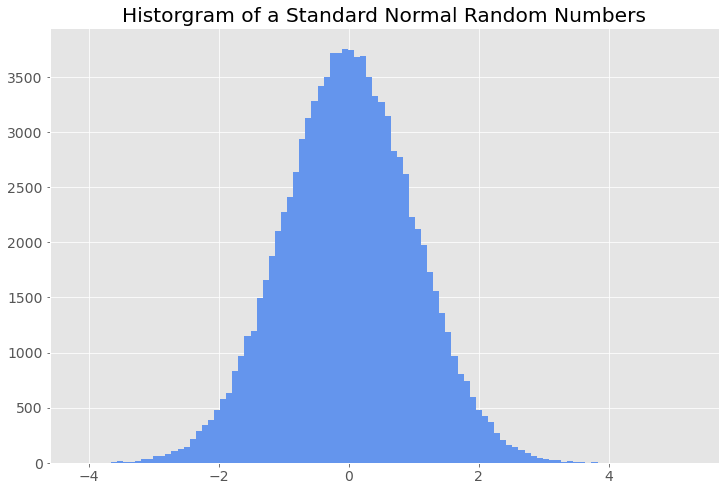

In [90]:
# Plot the histogram of the psuedo random numbers using matplotlib
plt.hist(pd.DataFrame(random.standard_normal(100000)), bins=100, color='cornflowerblue')
plt.title('Historgram of a Standard Normal Random Numbers');

In [106]:
# Assign simulated price path to dataframe for analysis and plotting
price_path = pd.DataFrame(simulate_path(100, 0.05, 0.20, 1, 252, 10000))

# Verify the generated price paths
price_path.tail()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
247,131.313302,79.364503,106.156799,71.367163,87.490982,131.509352,176.911043,118.701239,83.522140,88.454186,...,101.723356,128.219921,104.907044,133.355991,134.026101,83.272560,106.835892,91.215514,124.372970,83.883379
248,130.147580,79.938315,103.636303,71.720664,88.549816,133.027055,177.292852,118.521978,86.317631,86.355534,...,99.881084,130.699998,106.478219,134.075515,136.688539,85.123769,107.320728,91.263819,123.484691,82.334934
249,126.450236,79.577392,104.283823,73.338401,88.473747,131.700673,175.309777,117.774926,86.444515,85.402989,...,98.306190,129.562361,105.844251,132.418815,135.524827,86.156681,108.929585,91.263748,121.604420,83.468518
250,125.820758,78.932184,100.705903,73.800150,88.708281,132.755170,172.349643,116.884574,85.710538,86.666980,...,99.439915,127.325081,105.539276,134.684373,134.114140,85.831625,109.616787,91.153419,120.935583,82.363878
251,124.024334,78.218559,101.172193,73.032445,90.232423,133.475231,170.759071,117.289842,85.307681,87.272319,...,98.982979,124.101407,105.903694,134.574444,133.584385,85.569509,110.197362,91.346203,119.688163,81.206857


In [107]:
# price_path.to_csv('C:/Users/Riaz/Desktop/price.csv',index=False)

In [108]:
price_path.mean(axis=0)

0       113.584600
1        90.469377
2       104.389930
3        89.819254
4        89.658917
           ...    
9995     89.228570
9996    103.646562
9997     95.784284
9998    105.161117
9999     89.354218
Length: 10000, dtype: float64

### Histogram of Simulated Paths

The paths simulated earlier are now used to produce a distribution at expiry, i.e. $S_{T}$

In [109]:
# Plot the histogram of the simulated price path at maturity
price_path.iloc[-1].iplot(kind='histogram', title= 'Simulated Geometric Brownian Motion at Maturity', bins=200)

In [110]:
# Plot simulated price paths 
price_path.iloc[:,:100].iplot(title='Simulated stock price paths', xTitle='Time Steps', yTitle='Stock price')

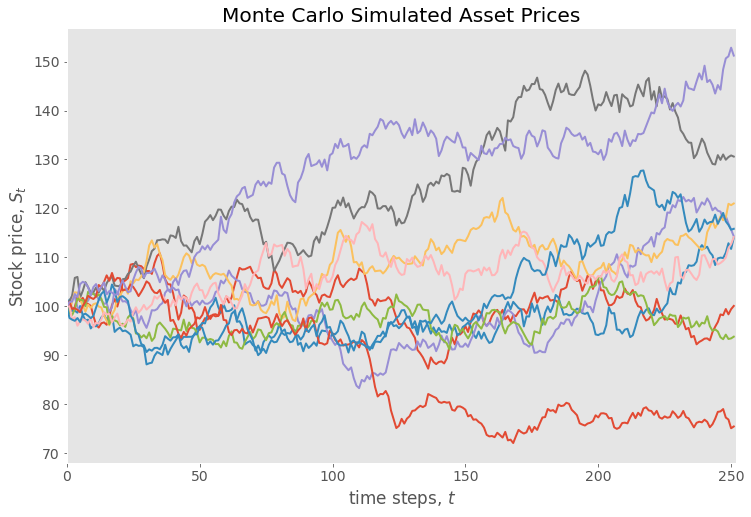

In [111]:
# Plot initial 100 simulated path using matplotlib
S =  simulate_path(100, 0.05, 0.20, 1, 252, 10)
plt.plot(S[:,:100])
plt.grid(False)
plt.xlabel('time steps, $t$')
plt.xlim(0,252)
plt.ylabel('Stock price, $S_t$')
plt.title('Monte Carlo Simulated Asset Prices');
plt.show()

## Payoffs and pricing for plain vanillas

The option price at any time $t<T$ is the expected value of its discounted payoff. The call and put payoff in turn are

\begin{equation*}
   C(S,T) = \max \left[S_{T} - K, 0 \right ]
\end{equation*}

\begin{equation*}
   P(S,T) = \max \left[-S_{T} + K, 0 \right ]
\end{equation*}

The call price if $PV$ denotes the present value, becomes

\begin{equation*}
   C(S,t) = PV\times\mathbb{E}^{\mathbb{Q}}[\max (S_{T}-K , 0)]
\end{equation*}

The simplest case of constant rate of interest then allows us to write 

\begin{equation*}
   C(S,t) = e^{−r(T−t)}\mathbb{E}[\max (S_{T}-K , 0)]
\end{equation*}

In [112]:
S = simulate_path(100, 0.05, 0.20, 1, 252, 100000)
S[-1] # recall for a European we want the price at expiry

array([105.12971248, 102.39218776, 111.60504919, ..., 102.61537282,
       122.64965379,  98.83522275])

In [113]:
# Call the simulation function
S = simulate_path(100, 0.05, 0.20, 1, 252, 100000)

# Define parameters
K = 100.; r = 0.05; T = 1; 

# Calculate the discounted value of the expeced payoff
Call = exp(-r*T)* mean(maximum(S[-1] - K, 0))
Put = exp(-r*T)* mean(maximum(K - S[-1], 0))
C1=exp(-r*T)*mean(np.heaviside(S[-1]-K,0))
# Exercise include a binray put
# Test the put-call parity for binaries
# Print the values
print(f'European Call Option Value: {Call:0.4f}')
print(f'European Put Option Value: {Put:0.4f}')
print(C1)

European Call Option Value: 10.3913
European Put Option Value: 5.5379
0.5331070186671802


### Visualization of Option Payoff

In [25]:
# range of spot prices 
payoff = pd.DataFrame({'Spot': arange(200)})
payoff['Call Value'] = maximum(0, payoff['Spot'] - 100)
payoff['Put Value'] = maximum(0, 100 - payoff['Spot'])

In [26]:
payoff[['Call Value', 'Put Value']].iplot(title = 'Payoff at Maturity', 
                                          xTitle='Spot', yTitle='Option Value',
                                          subplots=True)

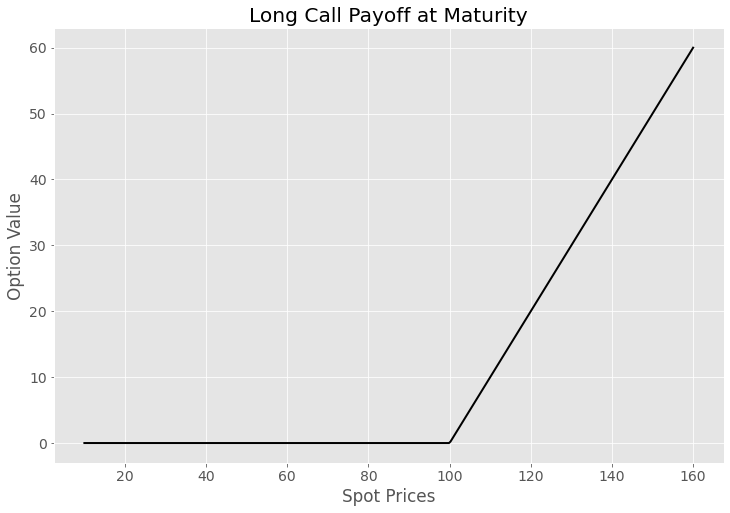

In [42]:
# plotting using matplotlib
# range of spot prices 
sT= linspace(10,160,400)

# payoff plot for long call option
plt.plot(sT,maximum(sT - K, 0),color='k')
plt.title('Long Call Payoff at Maturity')
plt.xlabel('Spot Prices')
plt.ylabel('Option Value');

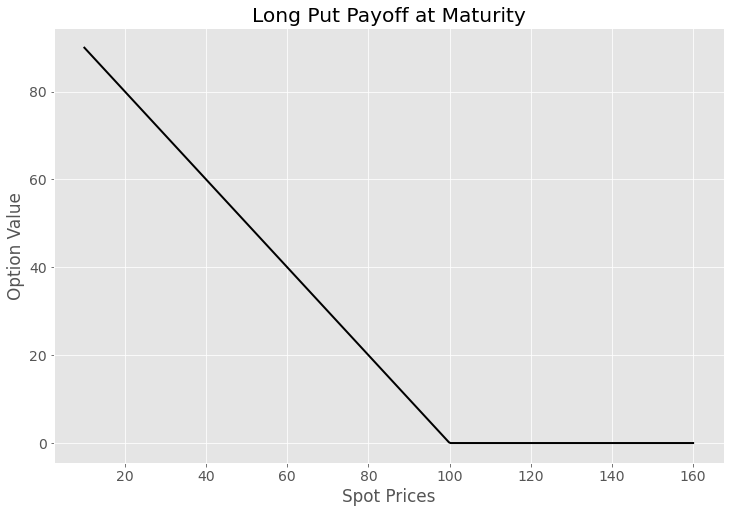

In [128]:
# payoff plot for long put option
plt.plot(sT,maximum(K - sT, 0),color='k')
plt.title('Long Put Payoff at Maturity')
plt.xlabel('Spot Prices')
plt.ylabel('Option Value');

## Asian Call Option 

An Asian option is an option where the payoff depends on the average price of the underlying asset over a certain period of time. Averaging can be either be Arithmetic or Geometric. There are two types of Asian options: **fixed strike**, where averaging price is used in place of underlying price; and **fixed price**, where averaging price is used in place of strike.

We'll now price a fixed strike arthmetic average option using Monte Carlo simulation.

To summarise Asian payoffs:

The simple case of an arithmetic average is 
\begin{equation*}
A=\frac{1}{N}\underset{i=1}{\overset{N}{\sum }}S\left( t_{i}\right) .
\end{equation*}
The running average is given by 
\begin{equation*}
A_{i}=\frac{1}{i}\underset{j=1}{\overset{i}{\sum }}S\left( t_{j}\right) 
\end{equation*}
For geometric averaging
\begin{equation*}
G=\left( \underset{i=1}{\overset{N}{\prod }}S\left( t_{i}\right) \right)
^{1/N}
\end{equation*}
It is more common to take natural logs and rearrange as
\begin{equation*}
G=\exp \left( \frac{1}{N}\underset{i=1}{\overset{N}{\sum }}\log S\left(
t_{i}\right) \right) 
\end{equation*}
which is the exponential of the arithmetic average of the log of the stock
prices. 

The payoff of the options is given by

\begin{equation*}
   C_{T} = \max \left [\left (\frac{1}n \underset{i=1}{\overset{n}{\sum }}S_{i} - K)\right), 0\right]
\end{equation*}



\begin{equation*}
   C_{T} = \max (S_{A} - K, 0)
\end{equation*}

where $S_{A}$ is the average price of the underlying asset over the life of the option.  To price an option using a Monte Carlo simulation we use a risk-neutral valuation, where the fair value for a derivative is the expected value of its future payoff. So at any date before maturity, denoted by $t$ , the option's value is the present value of the expectation of its payoff at maturity, $T$.

\begin{equation*}
   C = PV(\mathbb{E}[\max (S_{A}-K, 0)])
\end{equation*}

Under the risk-neutral framework, we assume the asset is going to earn, on average, the risk-free interest rate. Hence, the option value at time $t$ would simply be the discounted value of the expected payoff.

\begin{equation*}
   C= e^{−r(T−t)}\mathbb{E}[\max (S_{A}-K, 0)]
\end{equation*}

In [130]:
# Call the simulation function
S = simulate_path(100, 0.05, 0.20, 1, 252, 100000)

# Define parameters
K = 100.; r = 0.05; T = 1; t0=0

# Average price
A = S.mean(axis=0)   
    
# Calculate the discounted value of the expeced payoff
A_call = exp(-r*(T-t0)) * mean(maximum(A - K, 0)) # mean is for present value which is for discounting
A_put = exp(-r*(T-t0)) * mean(maximum(K - A, 0))

# Print the values
print(f'Arithmetic mean Asian Call Option Value: {A_call:0.4f}')
print(f'Arithmetic mean Asian Put Option Value: {A_put:0.4f}')

Arithmetic mean Asian Call Option Value: 5.7215
Arithmetic mean Asian Put Option Value: 3.3321


In [131]:
from scipy.stats import gmean

# geometric average price
A_g = gmean(S)   
  
# Calculate the discounted value of the expeced payoff
C0 = exp(-r*T) * mean(maximum(A_g - K, 0)) # mean is for present value which is for discounting
P0 = exp(-r*T) * mean(maximum(K - A_g, 0))

# Print the values
print(f'Geometric mean Asian Call Option Value: {C0:0.4f}')
print(f'Geometric mean Asian Put Option Value: {P0:0.4f}')

Geometric mean Asian Call Option Value: 5.5061
Geometric mean Asian Put Option Value: 3.4506


## Monte Carlo Integration

What about applying some of these methods to Monte Carlo approximation of integrals? Consider the following motivating example: 

Estimate $\theta =\mathbb{E}\left[ e^{U^{2}}\right] ,$
where $U\sim U\left( 0,1\right) .$

We note that $\mathbb{E}\left[ e^{U^{2}}\right] $ can be expressed in
integral form, i.e.
\begin{equation*}
\mathbb{E}\left[ e^{U^{2}}\right] =\int\nolimits_{0}^{1}e^{x^{2}}p\left(
x\right) dx
\end{equation*}
where $p\left( x\right) $ is the density function of a $U\left( 0,1\right) $
\begin{equation*}
p\left( x\right) =\left\{ 
\begin{array}{c}
1 \\ 
0
\end{array}
\begin{array}{c}
0<x<1 \\ 
\text{otherwise}
\end{array}
\right.
\end{equation*}
hence
\begin{equation*}
\mathbb{E}\left[ e^{U^{2}}\right] =\int\nolimits_{0}^{1}e^{x^{2}}dx.
\end{equation*}
This integral does not have an analytical solution. The theme of Monte Carlo integration is to consider solving numerically, using simulations. We use the Monte Carlo simulation procedures:

* Generate a sequence $U_{1},U_{2},...,U_{n}\sim U\left( 0,1\right) $ where $U_{i}$ are i.i.d (independent and identically distributed)

* Compute $Y_{i}=e^{U_{i}^{2}}$ $\left( i=1,...,n\right) $

* Estimate $\theta $ by
\begin{eqnarray*}
\widehat{\theta }_{n} &\equiv &\frac{1}{n}\underset{i=1}{\overset{n}{\sum }}
Y_{i} \\
&=&\frac{1}{n}\underset{i=1}{\overset{n}{\sum }}e^{U_{i}^{2}}
\end{eqnarray*}
i.e. use the sample mean of the $e^{U_{i}^{2}}$ terms.


Suppose $f\left( \cdot \right) $ is some function such that $f:\left[ 0,1
\right] \rightarrow \mathbb{R}.$ The basic problem is to evaluate the
integral

$$I=\int\nolimits_{0}^{1}f\left( x\right) dx$$
Consider e.g. the earlier problem $f\left( x\right) =e^{x^{2}},$ for which
an analytical solution cannot be obtained.

Note that if $U\sim U\left( 0,1\right) $ then
\begin{equation*}
\mathbb{E}\left[ f\left( U\right) \right] =\int\nolimits_{0}^{1}f\left(
u\right) p\left( u\right) du
\end{equation*}
where the density $p\left( u\right) $ of a uniformly distributed random
variable $U\left( 0,1\right) $ is given earlier. Hence 
\begin{eqnarray*}
\mathbb{E}\left[ f\left( U\right) \right] &=&\int\nolimits_{0}^{1}f\left(
u\right) p\left( u\right) du \\
&=&I.
\end{eqnarray*}
So the problem of estimating $I$ becomes equivalent to the exercise of
estimating $\mathbb{E}\left[ f\left( U\right) \right] $ where $U\sim U\left(
0,1\right) .$

**Exercise:** How can the code above be changed to calculate the skew and kurtosis for a random variable $X\sim{N(0,1)}$?

Very often we will be concerned with an arbitrary domain, other than $\left[
0,1\right] .$ This simply means that the initial part of the problem will
involve seeking a transformation that converts $\left[ a,b\right] $ to the
domain $\left[ 0,1\right].$ We consider two fundamental cases.

1. Let $f\left( \cdot \right) $ be a function s.t. $f:\left[ a,b\right]
\rightarrow \mathbb{R}$ where $-\infty <a<b<\infty .$ The problem is to evaluate the integral
$I=\int\nolimits_{a}^{b}f\left( x\right) dx.$
In this case consider the following substitution
$y=\frac{x-a}{b-a}$
which gives $dy=dx/\left( b-a\right) .$ This gives
$I =\left( b-a\right) \int\nolimits_{0}^{1}f\left( y\times \left(b-a\right) +a\right) dy \\
=\left( b-a\right) \mathbb{E}\left[ f\left( U\times \left( b-a\right)+a\right) \right]$
where $U\sim U\left( 0,1\right) .$ Hence $I$ has been expressed as the product of a constant and expected value of a function of a $U\left(0,1\right) $ random number; the latter can be estimated by simulation.

2. Let $g\left( \cdot \right) $ be some function s.t. $g:\left[ 0,\infty\right) \rightarrow \mathbb{R}$ where $-\infty <a<b<\infty .$ The problem is to evaluate the integral
$I=\int\nolimits_{0}^{\infty }g\left( x\right) dx,$
provided $I<\infty .$ So this is the area under the curve $g\left( x\right) $
between $0$ and $\infty .$ In this case use the following substitution
$y=\frac{1}{1+x}$
which is equivalent to $x=-1+\frac{1}{y}.$ This gives
$$dy=-dx/\left( 1+x\right) ^{2}=-y^{2}dx.$$
The resulting problem is 
$$I =\int\nolimits_{0}^{1}\frac{g\left( \frac{1}{y}-1\right) }{y^{2}}dy \\
=\mathbb{E}\left[ \frac{g\left( -1+\frac{1}{U}\right) }{U^{2}}\right]$$
where $U\sim U\left( 0,1\right) .$ Hence $I$ has again been expressed as the
expected value of a function of a $U\left( 0,1\right) $ random number; to be
estimated by simulation.


Let $g\left( \cdot \right) $ be some function s.t. $g:\left[ 0,\infty
\right) \rightarrow \mathbb{R}$ where $-\infty <a<b<\infty .$ The problem is
to evaluate the integral

$I=\int\nolimits_{0}^{\infty }g\left( x\right) dx,$

provided $I<\infty .$ So this is the area under the curve $g\left( x\right) $
between $0$ and $\infty .$ In this case use the following substitution

$y=\frac{1}{1+x}$

which is equivalent to $x=-1+\frac{1}{y}.$ This gives

$$dy=-dx/\left( 1+x\right) ^{2} \\
=-y^{2}dx.$$
The resulting problem is 

$$I =\int\nolimits_{0}^{1}\frac{g\left( \frac{1}{y}-1\right) }{y^{2}}dy \\
=\mathbb{E}\left[ \frac{g\left( -1+\frac{1}{U}\right) }{U^{2}}\right]$$

where $U\sim U\left( 0,1\right) .$ Hence $I$ has again been expressed as the
expected value of a function of a $U\left( 0,1\right) $ random number; to be
estimated by simulation.



**Example:** Describe a Monte Carlo algorithm for estimating

$$\theta =\int\nolimits_{0}^{\infty }e^{-x^{3}}dx.$$
To estimate $\theta $ requires a change of variable (and limits of
integration) since we are working with $U(0,1).$
Consider the transformation 
\begin{eqnarray*}
x =\frac{1-y}{y} \\
dx =-\frac{1}{y^{2}}dy \\
\int\nolimits_{0}^{\infty }f\left( x\right) dx &\longrightarrow
&\int\nolimits_{1}^{0}F\left( y\right) dy
\end{eqnarray*}
So
\begin{eqnarray*}
\theta =\int\nolimits_{0}^{\infty
}e^{-x^{3}}dx=\int\nolimits_{1}^{0}e^{-\left( -1+1/y\right) ^{3}}\left( -
\tfrac{1}{y^{2}}\right) dy \\
=\int\nolimits_{0}^{1}\tfrac{1}{y^{2}}e^{-\left( -1+1/y\right) ^{3}}dy
\end{eqnarray*}
where the final integral is an expectation, written 
$\mathbb{E}\left[ \frac{1}{U^{2}}e^{-\left( -1+1/U\right) ^{3}}\right]$
of a random variable $U\sim U\left( 0,1\right) .$


The Monte Carlo algorithm now becomes

1. Simulate $\left\{ U_{i}\right\} _{i=1}^{N}\sim U\left(0,1\right) $

2. Calculate $X_{i}=\tfrac{1}{U_{i}^{2}}e^{-\left( -1+1/U_{i}\right)^{3}}$ for each $i=1,.....,N$

3. $$\widehat{\theta }=\frac{1}{N}\underset{n=1}{\overset{N}{\sum }}X_{i}$$


**Exercise:** Write a Python program to approx $\theta$ as defined above.



**Exercise:** Consider the process
\begin{equation*}
X_{t}=xe^{-\kappa t}+\theta \left( 1-e^{-\kappa t}\right) +\sigma \sqrt{%
\frac{1-e^{-\kappa t}}{2\kappa }}\phi 
\end{equation*}
where $X_{0}=x$ and $\phi \sim N\left( 0,1\right) .$ $\kappa $ is the speed, 
$\theta $ is the mean and $\sigma $ the volatility.

Take the following parameters 
\begin{equation*}
x=1;\ \kappa =1;\ \theta =1;\ \sigma =0.5
\end{equation*}
By running simulations of $X_{t}$ calculate the mean and compare with $\mathbb{E}\left[ X_{t}\right] .$

Now consider evaluating the Gaussian integral
\begin{equation*}
J=\frac{1}{\sqrt{2\pi }}\int\nolimits_{-\infty }^{\infty }x^{2}\exp \left(
-x^{2}/2\right) dx
\end{equation*}

by writing this as 
\begin{equation*}
J=\mathbb{E}[X^{2}]\sim J_{N}=\frac{1}{N}\underset{n=1}{\overset{N}{\sum }}x_{n}^{2}.
\end{equation*}